In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [2]:
df = pd.read_csv(r'C:\Users\Mahe\Desktop\Wildfire-Predictor\final.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,date,lat,lon,mask,lst,lstn,ndvi,vcr,prec,ma_cat
0,2019-06-02,39.737500,-122.295833,9.0,310.26000,290.921693,0.3108,0.59,0.718065,1
1,2019-06-10,39.737500,-122.295833,5.0,323.92000,290.921693,0.2526,0.59,0.000000,0
2,2019-06-18,39.737500,-122.295833,5.0,309.33877,297.900000,0.2526,0.59,0.000000,0
3,2019-06-02,39.729167,-122.295833,9.0,310.36000,290.921693,0.3198,0.57,0.718065,1
4,2019-06-10,39.729167,-122.295833,5.0,321.90000,290.921693,0.2670,0.57,0.000000,0


In [3]:
X = df[['vcr', 'lst','ndvi','lstn','prec']] .values  #.astype(float)
x=df[['vcr', 'lst','ndvi','lstn','prec']]
X[0:5]

array([[5.90000000e-01, 3.10260000e+02, 3.10800000e-01, 2.90921693e+02,
        7.18065143e-01],
       [5.90000000e-01, 3.23920000e+02, 2.52600000e-01, 2.90921693e+02,
        0.00000000e+00],
       [5.90000000e-01, 3.09338770e+02, 2.52600000e-01, 2.97900000e+02,
        0.00000000e+00],
       [5.70000000e-01, 3.10360000e+02, 3.19800000e-01, 2.90921693e+02,
        7.18065143e-01],
       [5.70000000e-01, 3.21900000e+02, 2.67000000e-01, 2.90921693e+02,
        0.00000000e+00]])

In [4]:
y = df['ma_cat'].values
y[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Before SMOTE

In [7]:
print(sum(y_train == 1))
print(sum(y_train == 0))

78
1255


In [6]:
dtr = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtr # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
y_pred = dtr.predict(X_test)

In [28]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9423076923076923


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       541
           1       0.25      0.03      0.06        31

    accuracy                           0.94       572
   macro avg       0.60      0.51      0.51       572
weighted avg       0.91      0.94      0.92       572



In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

Confusion matrix, without normalization
[[  1  30]
 [  3 538]]


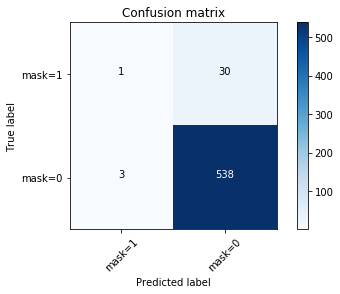

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

# After SMOTE

In [7]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [8]:
print(sum(y_train == 1))
print(sum(y_train == 0))

1255
1255


In [9]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
y_pred=dtr.predict(X_test)

In [11]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.6870629370629371


In [12]:
feature_imp = pd.Series(dtr.feature_importances_,index=x.columns.values).sort_values(ascending=False)
feature_imp

prec    0.390238
lst     0.347887
lstn    0.188715
ndvi    0.037256
vcr     0.035903
dtype: float64

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       541
           1       0.10      0.58      0.17        31

    accuracy                           0.69       572
   macro avg       0.53      0.64      0.49       572
weighted avg       0.92      0.69      0.77       572



Confusion matrix, without normalization
[[ 18  13]
 [166 375]]


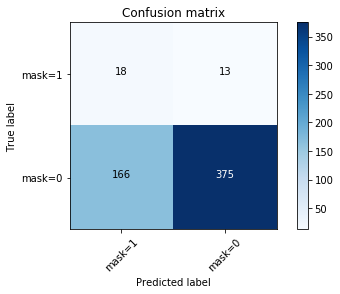

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

In [26]:
dt_probs = dtr.predict_proba(X_test)
dt_probs

array([[0.86, 0.14],
       [0.86, 0.14],
       [0.86, 0.14],
       ...,
       [0.86, 0.14],
       [0.39, 0.61],
       [0.86, 0.14]])

In [27]:
dt_probs = dt_probs[:, 1]
dt_probs

array([0.14, 0.14, 0.14, 0.14, 0.61, 0.61, 0.85, 0.14, 0.  , 0.14, 0.61,
       0.14, 0.14, 0.14, 0.61, 0.61, 0.61, 0.  , 0.14, 0.14, 0.14, 0.  ,
       0.14, 0.61, 0.  , 0.14, 0.  , 0.  , 0.14, 0.61, 0.14, 0.43, 0.  ,
       0.14, 0.  , 0.14, 0.61, 0.14, 0.  , 0.14, 0.61, 0.61, 0.14, 0.  ,
       0.14, 0.61, 0.61, 0.14, 0.  , 0.  , 0.14, 0.85, 0.14, 0.14, 0.61,
       0.  , 0.  , 0.85, 0.61, 0.61, 0.14, 0.85, 0.  , 0.61, 0.61, 0.61,
       0.61, 0.  , 0.  , 0.  , 0.54, 0.14, 0.  , 0.14, 0.14, 0.85, 0.61,
       0.  , 0.54, 0.14, 0.14, 0.61, 0.14, 0.35, 0.  , 0.61, 0.54, 0.  ,
       0.  , 0.14, 0.61, 0.14, 0.61, 0.  , 0.  , 0.61, 0.61, 0.14, 0.14,
       0.85, 0.  , 0.  , 0.14, 0.35, 0.61, 0.61, 0.85, 0.86, 0.61, 0.  ,
       0.61, 0.61, 0.14, 0.14, 0.61, 0.86, 0.  , 0.14, 0.61, 0.61, 0.14,
       0.14, 0.14, 0.85, 0.14, 0.14, 0.  , 0.  , 0.  , 0.14, 0.  , 0.85,
       0.14, 0.  , 0.14, 0.14, 0.61, 0.14, 0.85, 0.35, 0.14, 0.61, 0.14,
       0.85, 0.14, 0.14, 0.14, 0.  , 0.61, 0.14, 0.

In [19]:
prec, rec, _ = precision_recall_curve(y_test, dt_probs)
f1 = f1_score(y_test, y_pred) 

In [20]:
type(rec)

numpy.ndarray

In [22]:
au = auc(rec, prec)
print('Decision tree: f1=%.3f auc=%.3f' % (f1, au))

Decision tree: f1=0.167 auc=0.183


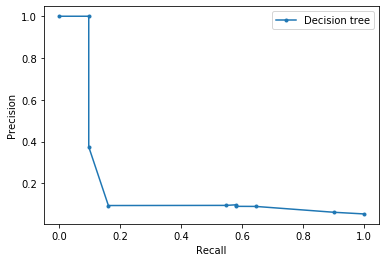

In [25]:
plt.plot(rec, prec, marker='.', label='Decision tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()